# Preprocessing and modeling

## Flows:

### 1. Remove unwanted features

### 2. Features engineering

### 3. Train and eveluate two models: Linear Regression vs. Random Forest Regression

##


In [1]:
# First, import the relevant modules and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#suppress future warnings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [2]:
# Import Austin_TX_House_Listings_data_v1.csv & us_income_zipcode.csv
df = pd.read_csv('../03_processed_data/oil_production_wrangled_data.csv', low_memory=False)

In [3]:
df.shape

(2376, 6)

In [4]:
df.head()

,country_name,type,product,flow,year,value
0,Australia,Balance,Crude oil,Industrial Production,2021,18029.678
1,Austria,Balance,Crude oil,Industrial Production,2021,561.852
2,Belgium,Balance,Crude oil,Industrial Production,2021,0.000
3,Canada,Balance,Crude oil,Industrial Production,2021,266630.180
4,Chile,Balance,Crude oil,Industrial Production,2021,340.997


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2376 non-null   object 
 1   type          2376 non-null   object 
 2   product       2376 non-null   object 
 3   flow          2376 non-null   object 
 4   year          2376 non-null   int64  
 5   value         2376 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 111.5+ KB


In [6]:
df['year'] = df['year'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2376 non-null   object 
 1   type          2376 non-null   object 
 2   product       2376 non-null   object 
 3   flow          2376 non-null   object 
 4   year          2376 non-null   object 
 5   value         2376 non-null   float64
dtypes: float64(1), object(5)
memory usage: 111.5+ KB


In [8]:
df.describe().round(2)

,value
count,2376.00
mean,6298.35
std,36784.31
min,-2442.00
25%,48.56
50%,462.11
75%,2594.84
max,790672.41


In [9]:
df.nunique()

country_name      36
type               1
product           11
flow               4
year               3
value           1808
dtype: int64

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'country_name': ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'South Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'Norway' 'New Zealand'
 'Poland' 'Portugal' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Türkiye' 'United Kingdom' 'United States']

Unique values in column 'type': ['Balance']

Unique values in column 'product': ['Crude oil' 'Liquified Petroleum Gas' 'Naphtha'
 'Total gas oil production' 'Total kerosene production'
 'Gasoline and diesel' 'Residual fuel oil' 'Other oil products'
 'Total oil products production' 'Total oil production'
 'Middle distillates']

Unique values in column 'flow': ['Industrial Production' 'Net Deliveries' 'Consumption Pattern'
 'Storage Channelization']

Unique values in column 'year': [2021 2022 2023]

Unique values in column 'value': [ 1.8029678e+04  5.6185200e

## It looks like we don't need the 'type' feature / column since it is the same for all countries

In [11]:
# Remove the 'type' feature
df.drop(columns=['type','year'], inplace=True)
df.columns

Index(['country_name', 'product', 'flow', 'value'], dtype='object')

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR for each feature
IQR = Q3 - Q1

# Define outliers as any point outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
df_no_outliers = df[~outliers.any(axis=1)]

print("Original DataFrame:")
print(df.shape)
print("\nDataFrame without outliers:")
print(df_no_outliers.shape)

Original DataFrame:
(2376, 4)

DataFrame without outliers:
(2063, 4)


C:\Users\famma\AppData\Local\Temp\ipykernel_23560\3879531505.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\famma\AppData\Local\Temp\ipykernel_23560\3879531505.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\famma\AppData\Local\Temp\ipykernel_23560\3879531505.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


In [13]:
#df2 = df[df['product'] != ('Total gas oil production', 'Total kerosene production', 'Total oil products production', 'Total oil production')]
#df2.head()

In [14]:
#df2_no_outliers = df_no_outliers[df_no_outliers['value'] >= 0]
#df2_no_outliers.shape

In [15]:
df_wo_us = df_no_outliers[df_no_outliers.country_name != 'United States']
df_wo_us.country_name.unique()

array(['Austria', 'Belgium', 'Chile', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'South Korea',
       'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'New Zealand',
       'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Türkiye', 'Australia', 'Mexico', 'Norway',
       'United Kingdom', 'Canada'], dtype=object)

In [16]:
#countries_to_remove = ['United States','Canada']
#df_wo_us_ca = df_no_outliers[~df_no_outliers.country_name.isin(countries_to_remove)]
#df_wo_us_ca.country_name.unique()

## Create dummy features for categorical variables & Normalize the data

In [17]:
# Identify categorical columns
categorical_cols = df_wo_us.select_dtypes(include=['object']).columns

# Create dummy variables for all categorical columns
df_dummies = pd.get_dummies(df_wo_us, columns=categorical_cols, drop_first=True)

df_dummies.head()


,value,country_name_Austria,country_name_Belgium,country_name_Canada,country_name_Chile,country_name_Czech Republic,country_name_Denmark,country_name_Estonia,country_name_Finland,country_name_France,...,product_Naphtha,product_Other oil products,product_Residual fuel oil,product_Total gas oil production,product_Total kerosene production,product_Total oil production,product_Total oil products production,flow_Industrial Production,flow_Net Deliveries,flow_Storage Channelization
1,561.852,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,340.997,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,87.000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3239.000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_dummies.shape

(2042, 48)

## Train / Split data to train models

In [19]:
# Split the data into features (X) and target (y)
X = df_dummies.drop('value', axis=1)  # Features (dropping target variable 'value')
y = df_dummies['value']  # Target variable

## Normalize the features using StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Step 4: Apply train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the train and test sets
print("\nTraining Features Shape:")
print(X_train.shape)
print("\nTest Features Shape:")
print(X_test.shape)
print("\nTraining Target Shape:")
print(y_train.shape)
print("\nTest Target Shape:")
print(y_test.shape)


Training Features Shape:
(1429, 47)

Test Features Shape:
(613, 47)

Training Target Shape:
(1429,)

Test Target Shape:
(613,)


## Train and evaluate two models
## Linear Regression vs. Random Forest Regression

## Linear Regression

In [20]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# Linear Regression evaluation
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_linear).round(4)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear).round(4)}")
print(f"R² Score: {r2_score(y_test, y_pred_linear).round(4)}\n")

Linear Regression Evaluation:
Mean Absolute Error: 803.254
Mean Squared Error: 1213187.8114
R² Score: 0.3999



## Random Forest Regression

In [21]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

# Random Forest Regression evaluation
print("Random Forest Regression Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf).round(4)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf).round(4)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf).round(4)}")

Random Forest Regression Evaluation:
Mean Absolute Error: 515.6194
Mean Squared Error: 828804.4951
R² Score: 0.59


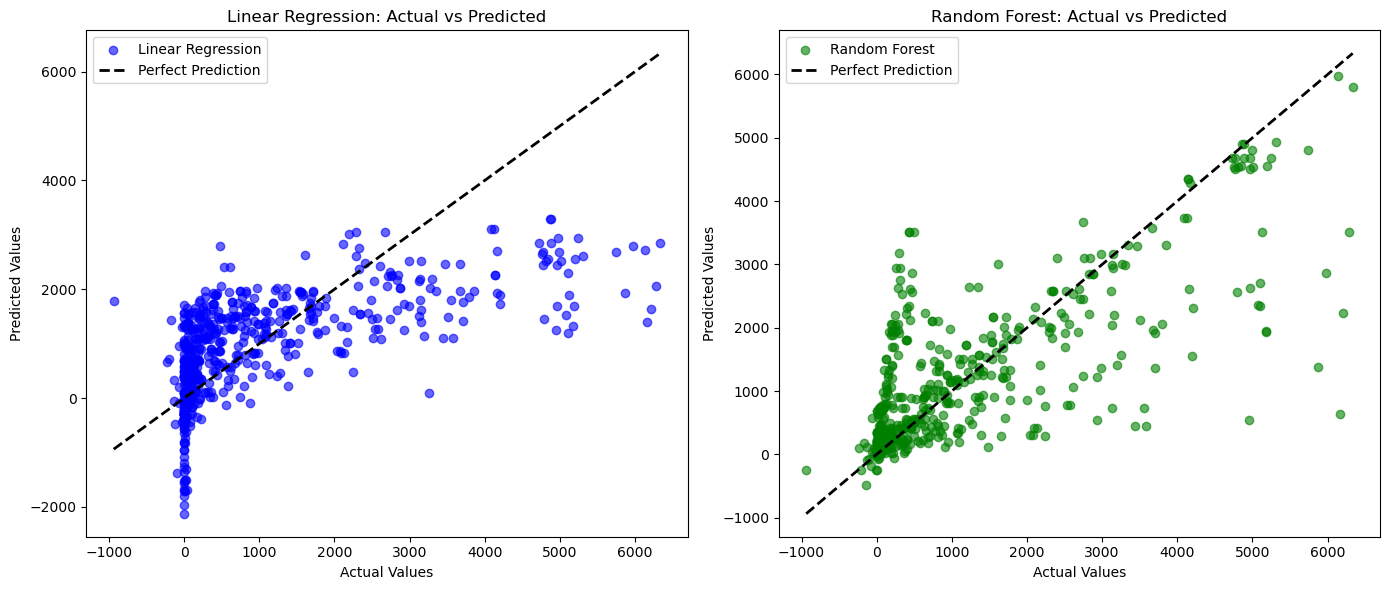

In [22]:
#1. Scatter Plot of Predictions vs. Actual Values

plt.figure(figsize=(14, 6))

# Scatter plot for Linear Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label="Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()

# Scatter plot for Random Forest predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()

# Save the plot as an image (e.g., PNG)
plt.savefig('../04_imges/Predictions_vs_Actual Values.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


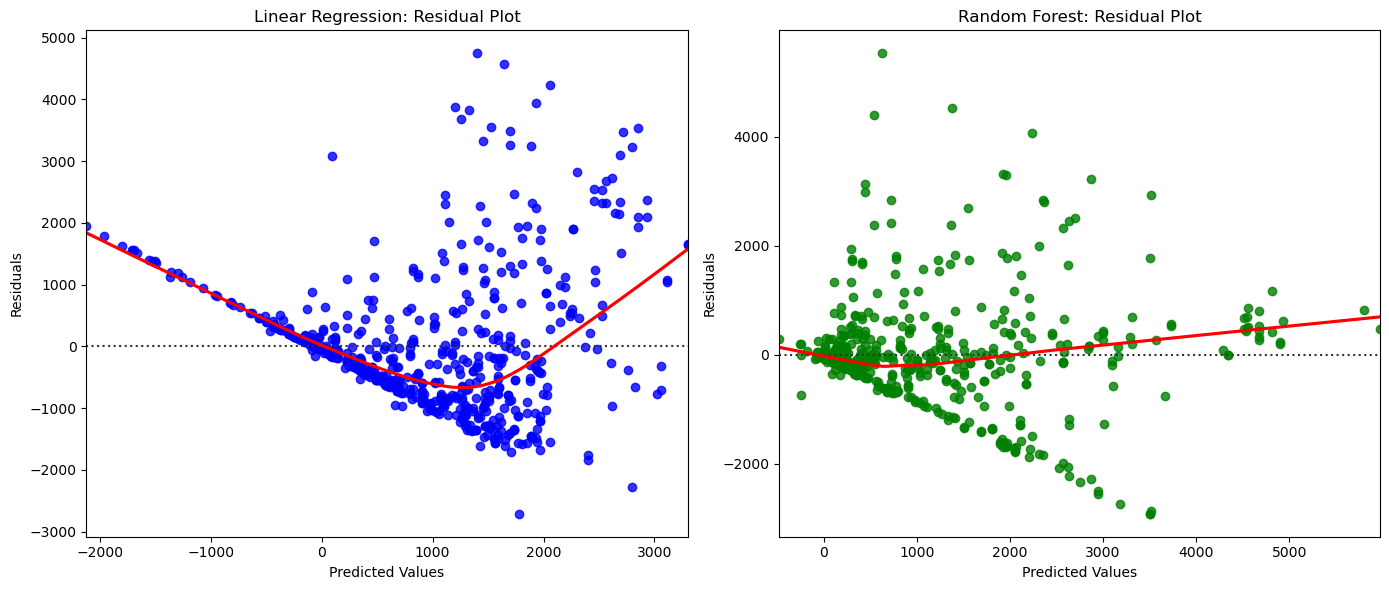

In [23]:
# 2. Residual Plot (Predictions Error Plot) for both models 
plt.figure(figsize=(14, 6))

# Residual plot for Linear Regression
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_linear, y=y_test, lowess=True, color="blue", line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")

# Residual plot for Random Forest
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_rf, y=y_test, lowess=True, color="green", line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest: Residual Plot")

# Save the plot as an image (e.g., PNG)
plt.savefig('../04_imges/Residual_Scatter_Plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

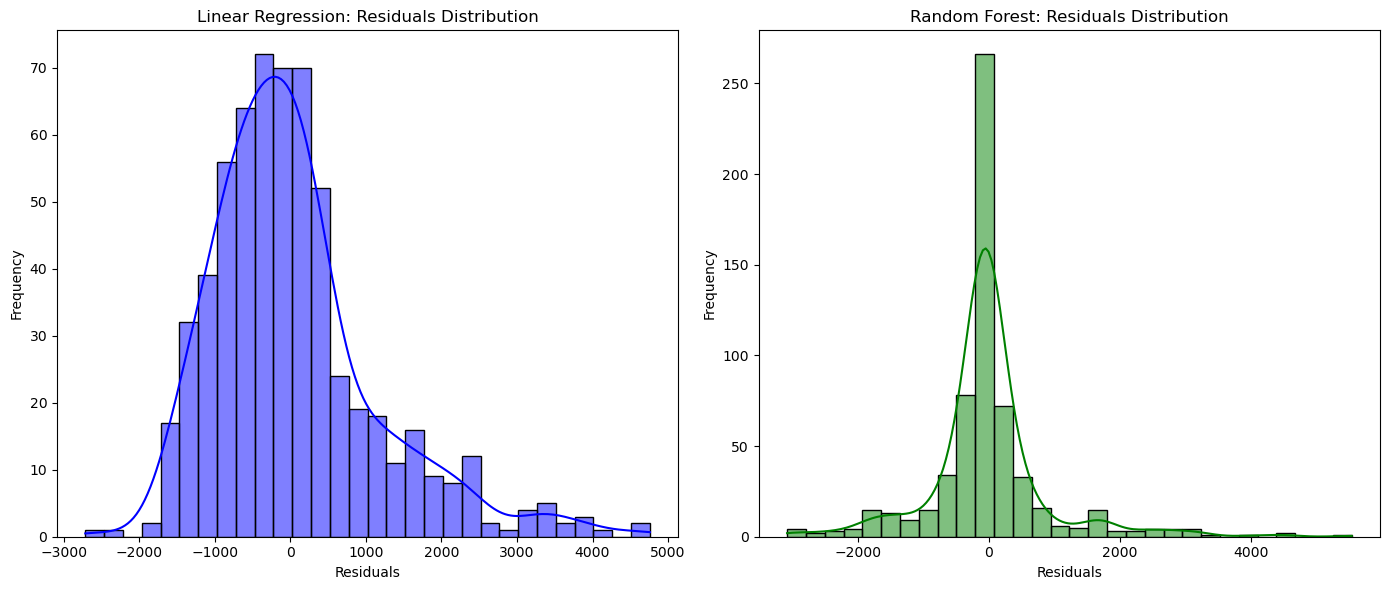

In [24]:
#3. Histogram of Residuals

# Plot histogram of residuals
plt.figure(figsize=(14, 6))

# Histogram for Linear Regression residuals
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_linear, kde=True, color="blue", bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Linear Regression: Residuals Distribution")

# Histogram for Random Forest residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_rf, kde=True, color="green", bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Random Forest: Residuals Distribution")

# Save the plot as an image (e.g., PNG)
plt.savefig('../04_imges/Residual_Histogram.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
